In [1]:
from inr_sos import DATA_DIR, load_mat

/home/habenhadush/github/mia/y2/s4/INR-SoS-Recon


# Exploring the L-matrix (Physics wave)

In [3]:
L_mat_path = DATA_DIR / "DL-based-SoS/forward_model_lr/L.mat"
L_matrix = load_mat(L_mat_path)['L']
L_matrix.shape

Detected v7.3 MATLAB file: L.mat
  -> Reconstructing sparse matrix: /L


(131072, 4096)

Analyzing 8 Transmissions (Frames)...


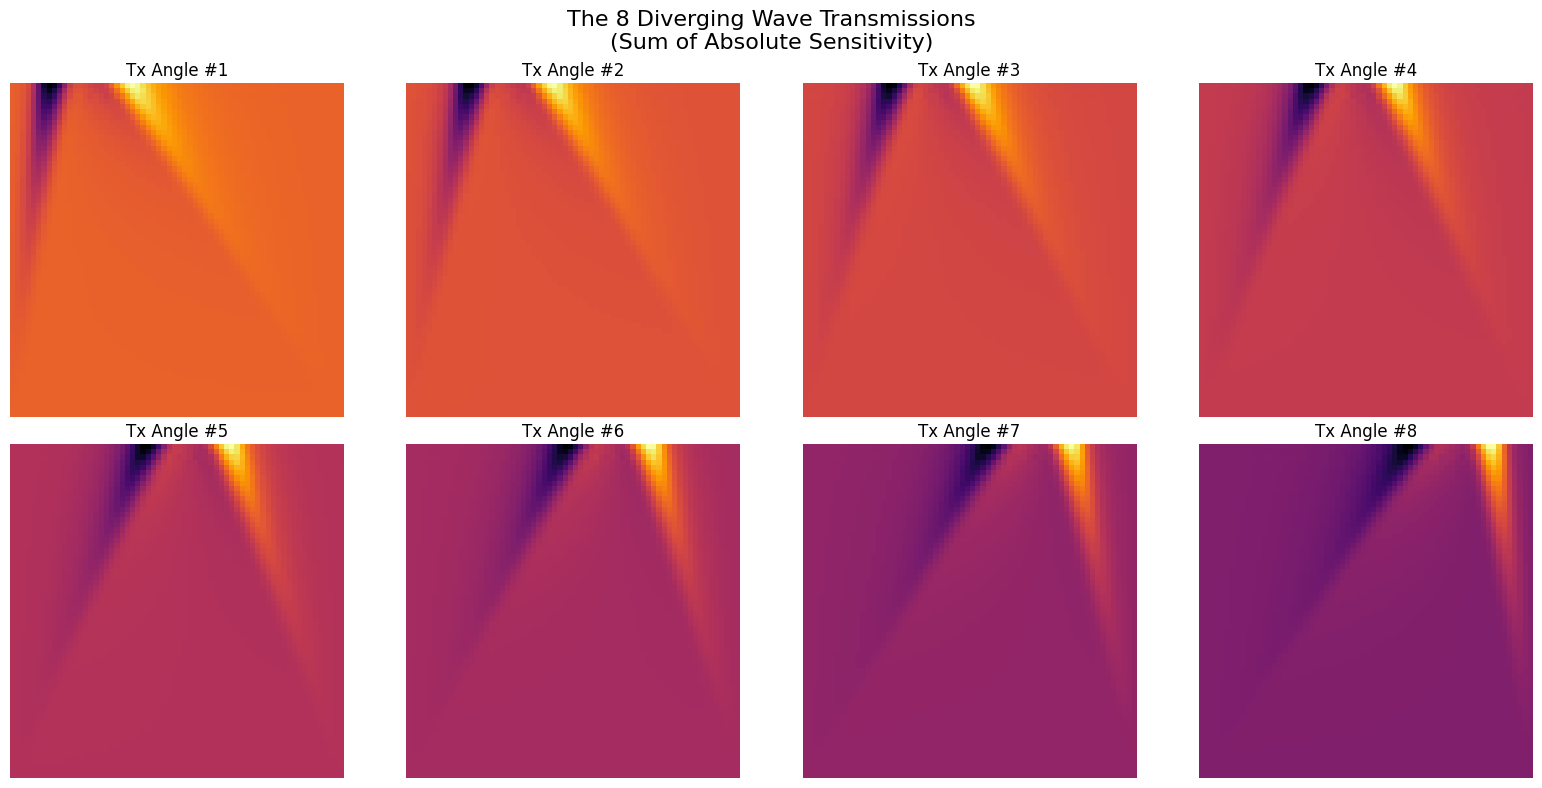

In [4]:
import matplotlib.pyplot as plt
import numpy as np
n_pixels_recon = 64 * 64   # 4096
n_pixels_data = 128 * 128  # 16384 (Size of one "Frame")
n_angles = 8

print(f"Analyzing {n_angles} Transmissions (Frames)...")

# 3. VISUALIZE THE 8 ANGLES
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i in range(n_angles):
    # Calculate start and end row for this angle
    start_row = i * n_pixels_data
    end_row = (i + 1) * n_pixels_data
    
    # Extract the block of 16,384 rows for this angle
    # This represents ALL rays fired during Transmission #i
    L_chunk = L_matrix[start_row:end_row, :]
    
    # "Collapse" the rays to see the overall coverage
    # We sum along the rows (axis 0) to see which pixels were hit the most
    coverage_map_flat = L_chunk.sum(axis=0) # Result shape: (1, 4096)
    
    # Reshape to Image (Remember: Order F)
    coverage_img = np.array(coverage_map_flat).reshape((64, 64), order='F')
    
    # Plot
    im = axes[i].imshow(coverage_img, cmap='inferno')
    axes[i].set_title(f"Tx Angle #{i+1}")
    axes[i].axis('off')

plt.suptitle("The 8 Diverging Wave Transmissions\n(Sum of Absolute Sensitivity)", fontsize=16)
plt.tight_layout()
plt.show()

# Exploring the grid parameter, and mask data

## grid parameter

In [5]:
grid_parameters_matrix = load_mat(DATA_DIR / "DL-based-SoS/forward_model_lr/grid_parameters.mat")

In [6]:
grid_parameters_matrix.keys()

dict_keys(['__header__', '__version__', '__globals__', 'xDT', 'xax_sos', 'xdt', 'zDT', 'zax_sos', 'zdt'])

In [7]:
print(
grid_parameters_matrix["xDT"].shape,
grid_parameters_matrix["xax_sos"].shape,
grid_parameters_matrix["xdt"].shape,
grid_parameters_matrix["zDT"].shape,
grid_parameters_matrix["zax_sos"].shape,
grid_parameters_matrix["zdt"].shape, sep="\n")

(1, 128)
(1, 64)
(128, 128)
(1, 128)
(1, 64)
(128, 128)


In [8]:
grid_parameters_matrix['xax_sos']

array([[-0.0189, -0.0183, -0.0177, -0.0171, -0.0165, -0.0159, -0.0153,
        -0.0147, -0.0141, -0.0135, -0.0129, -0.0123, -0.0117, -0.0111,
        -0.0105, -0.0099, -0.0093, -0.0087, -0.0081, -0.0075, -0.0069,
        -0.0063, -0.0057, -0.0051, -0.0045, -0.0039, -0.0033, -0.0027,
        -0.0021, -0.0015, -0.0009, -0.0003,  0.0003,  0.0009,  0.0015,
         0.0021,  0.0027,  0.0033,  0.0039,  0.0045,  0.0051,  0.0057,
         0.0063,  0.0069,  0.0075,  0.0081,  0.0087,  0.0093,  0.0099,
         0.0105,  0.0111,  0.0117,  0.0123,  0.0129,  0.0135,  0.0141,
         0.0147,  0.0153,  0.0159,  0.0165,  0.0171,  0.0177,  0.0183,
         0.0189]])

## mask data

In [9]:
mask_vector = load_mat(DATA_DIR / "DL-based-SoS/forward_model_lr/mask.mat")['mask']

Detected v7.3 MATLAB file: mask.mat


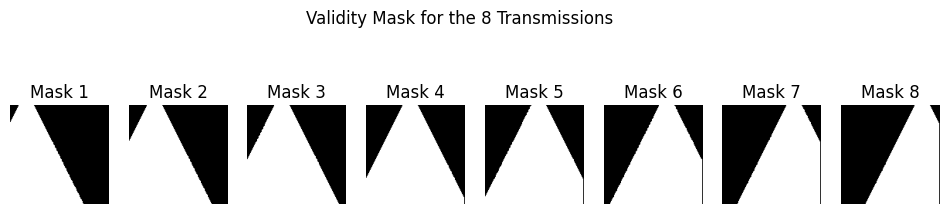

In [10]:
# Assume mask is loaded as 'mask_vector' shape (131072, 1)
# Reshape into (128, 128, 8)
# We use order='F' because it comes from MATLAB
mask_matrix = mask_vector.reshape((128, 128, 8), order='F')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(mask_matrix[:, :, i], cmap='gray')
    plt.title(f"Mask {i+1}")
    plt.axis('off')
plt.suptitle("Validity Mask for the 8 Transmissions")
plt.show()

# exploring K-wave data

In [ ]:
kwave_data =  load_mat(DATA_DIR / "DL-based-SoS/train-VS-8pairs-IC-081225.mat")

Detected v7.3 MATLAB file: train-VS-8pairs-IC-081225.mat
